In [12]:
"""
Data Exploration - Primary Dataset
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

print("="*60)
print("DATA EXPLORATION - PRIMARY DATASET")
print("="*60)

# Manual configuration (instead of importing from config.py)
DATA_RAW_PATH = '../data/raw/'
DATA_PROCESSED_PATH = '../data/processed/'
RESULTS_FIGURES_PATH = '../results/figures/'
RESULTS_METRICS_PATH = '../results/metrics/'

NUMERICAL_FEATURES = [
    'Age',
    'Systolic BP',
    'Diastolic',
    'BS',
    'Body Temp',
    'BMI',
    'Heart Rate'
]

BOOLEAN_FEATURES = [
    'Previous Complications',
    'Preexisting Diabetes',
    'Gestational Diabetes',
    'Mental Health'
]

ALL_FEATURES = NUMERICAL_FEATURES + BOOLEAN_FEATURES
TARGET_COLUMN = 'Risk Level'

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100

print("✓ Setup complete")
print(f"✓ Working directory: {os.getcwd()}")

DATA EXPLORATION - PRIMARY DATASET
✓ Setup complete
✓ Working directory: C:\Users\Quadir\Desktop\Final year project\development\notebooks


In [13]:
# ============================================================================
# 1. LOAD DATA
# ============================================================================
print("\n1. LOADING DATA...")

df = pd.read_csv(f'{DATA_RAW_PATH}primary_dataset.csv')

print(f"✓ Dataset loaded successfully")
print(f"  Shape: {df.shape}")
print(f"  Rows: {df.shape[0]}")
print(f"  Columns: {df.shape[1]}")

print(f"\nColumn names:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i}. {col}")
    
print(f"\nFirst 3 rows:")
print(df.head(3))


1. LOADING DATA...
✓ Dataset loaded successfully
  Shape: (1205, 12)
  Rows: 1205
  Columns: 12

Column names:
  1. Age
  2. Systolic BP
  3. Diastolic
  4. BS
  5. Body Temp
  6. BMI
  7. Previous Complications
  8. Preexisting Diabetes
  9. Gestational Diabetes
  10. Mental Health
  11. Heart Rate
  12. Risk Level

First 3 rows:
   Age  Systolic BP  Diastolic   BS  Body Temp   BMI  Previous Complications  \
0   22         90.0       60.0  9.0        100  18.0                     1.0   
1   22        110.0       70.0  7.1         98  20.4                     0.0   
2   27        110.0       70.0  7.5         98  23.0                     1.0   

   Preexisting Diabetes  Gestational Diabetes  Mental Health  Heart Rate  \
0                   1.0                     0              1        80.0   
1                   0.0                     0              0        74.0   
2                   0.0                     0              0        72.0   

  Risk Level  
0       High  
1        L

In [14]:
# ============================================================================
# 2. MISSING VALUES CHECK
# ============================================================================
print("\n2. MISSING VALUES CHECK")
print("="*60)

missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

print("\nMissing Values per Column:")
for col in df.columns:
    if missing[col] > 0:
        print(f"  {col}: {missing[col]} ({missing_pct[col]:.2f}%)")

total_missing = missing.sum()
print(f"\nTotal missing values: {total_missing}")

if total_missing > 0:
    print(f"⚠ Will need to handle {total_missing} missing values in preprocessing")
else:
    print("✓ No missing values - excellent!")


2. MISSING VALUES CHECK

Missing Values per Column:
  Systolic BP: 5 (0.41%)
  Diastolic: 4 (0.33%)
  BS: 2 (0.17%)
  BMI: 18 (1.49%)
  Previous Complications: 2 (0.17%)
  Preexisting Diabetes: 2 (0.17%)
  Heart Rate: 2 (0.17%)
  Risk Level: 18 (1.49%)

Total missing values: 53
⚠ Will need to handle 53 missing values in preprocessing


In [15]:
# ============================================================================
# 3. TARGET VARIABLE ANALYSIS
# ============================================================================
print("\n3. RISK LEVEL DISTRIBUTION")
print("="*60)

# Check unique values INCLUDING NaN
print(f"\nUnique values in '{TARGET_COLUMN}':")
print(df[TARGET_COLUMN].unique())

print(f"\nValue counts (including NaN):")
print(df[TARGET_COLUMN].value_counts(dropna=False))

# Calculate distribution (excluding NaN for now)
class_counts = df[TARGET_COLUMN].value_counts(dropna=True)
class_pct = (class_counts / class_counts.sum()) * 100

print("\nClass Distribution (excluding NaN):")
print(class_counts)

print("\nPercentages:")
for risk_level, pct in class_pct.items():
    print(f"  {risk_level}: {pct:.2f}%")

# Calculate imbalance
if len(class_counts) == 2:
    imbalance_ratio = class_counts.max() / class_counts.min()
    print(f"\nImbalance Ratio: {imbalance_ratio:.2f}:1")
    
    if imbalance_ratio > 3:
        print("⚠ Significant class imbalance - will use class_weight='balanced'")
    else:
        print("✓ Classes relatively balanced")

# Count rows with missing Risk Level
nan_count = df[TARGET_COLUMN].isna().sum()
if nan_count > 0:
    print(f"\n⚠ Warning: {nan_count} rows have missing Risk Level")
    print(f"  These will be removed during preprocessing ({nan_count/len(df)*100:.2f}% of data)")


3. RISK LEVEL DISTRIBUTION

Unique values in 'Risk Level':
['High' 'Low' nan]

Value counts (including NaN):
Risk Level
Low     713
High    474
NaN      18
Name: count, dtype: int64

Class Distribution (excluding NaN):
Risk Level
Low     713
High    474
Name: count, dtype: int64

Percentages:
  Low: 60.07%
  High: 39.93%

Imbalance Ratio: 1.50:1
✓ Classes relatively balanced

⚠ Warning: 18 rows have missing Risk Level
  These will be removed during preprocessing (1.49% of data)



✓ Figure saved: ../results/figures/class_distribution.png


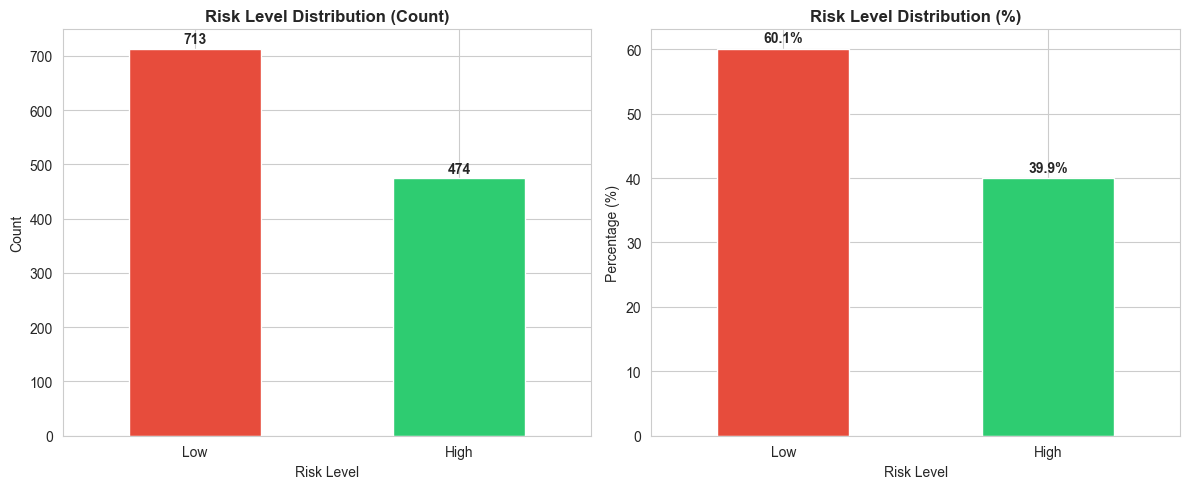

In [16]:
# Visualize class distribution (excluding NaN)
df_clean = df[df[TARGET_COLUMN].notna()].copy()

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Count plot
class_counts_plot = df_clean[TARGET_COLUMN].value_counts()
class_counts_plot.plot(kind='bar', ax=ax[0], color=['#e74c3c', '#2ecc71'])
ax[0].set_title('Risk Level Distribution (Count)', fontsize=12, fontweight='bold')
ax[0].set_xlabel('Risk Level')
ax[0].set_ylabel('Count')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=0)

# Add count labels on bars
for i, v in enumerate(class_counts_plot.values):
    ax[0].text(i, v + 10, str(v), ha='center', fontweight='bold')

# Percentage plot
class_pct_plot = (class_counts_plot / class_counts_plot.sum()) * 100
class_pct_plot.plot(kind='bar', ax=ax[1], color=['#e74c3c', '#2ecc71'])
ax[1].set_title('Risk Level Distribution (%)', fontsize=12, fontweight='bold')
ax[1].set_xlabel('Risk Level')
ax[1].set_ylabel('Percentage (%)')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=0)

# Add percentage labels
for i, v in enumerate(class_pct_plot.values):
    ax[1].text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig(f'{RESULTS_FIGURES_PATH}class_distribution.png', dpi=300, bbox_inches='tight')
print(f"\n✓ Figure saved: {RESULTS_FIGURES_PATH}class_distribution.png")
plt.show()

In [17]:
# ============================================================================
# 4. SUMMARY STATISTICS
# ============================================================================
print("\n4. SUMMARY STATISTICS")
print("="*60)

print("\nNumerical Features:")
print(df[NUMERICAL_FEATURES].describe())

print("\n" + "-"*60)
print("\nBoolean Features Distribution:")
for feature in BOOLEAN_FEATURES:
    print(f"\n{feature}:")
    counts = df[feature].value_counts(dropna=False)
    print(counts)
    
    # Check for missing in boolean features too
    if df[feature].isna().sum() > 0:
        print(f"  ⚠ Has {df[feature].isna().sum()} missing values")


4. SUMMARY STATISTICS

Numerical Features:
               Age  Systolic BP    Diastolic           BS    Body Temp  \
count  1205.000000  1200.000000  1201.000000  1203.000000  1205.000000   
mean     27.731950   116.819167    77.166528     7.501064    98.395851   
std      12.571074    18.715502    14.305148     3.049522     1.088363   
min      10.000000    70.000000    40.000000     3.000000    97.000000   
25%      21.000000   100.000000    65.000000     6.000000    98.000000   
50%      25.000000   120.000000    80.000000     6.900000    98.000000   
75%      32.000000   130.000000    90.000000     7.900000    98.000000   
max     325.000000   200.000000   140.000000    19.000000   103.000000   

               BMI   Heart Rate  
count  1187.000000  1203.000000  
mean     23.315080    75.817124  
std       3.875682     7.227338  
min       0.000000    58.000000  
25%      20.450000    70.000000  
50%      23.000000    76.000000  
75%      25.000000    80.000000  
max      37.00000


5. FEATURE CORRELATIONS

Correlation calculated on 1178 complete cases

✓ Figure saved: ../results/figures/correlation_matrix.png


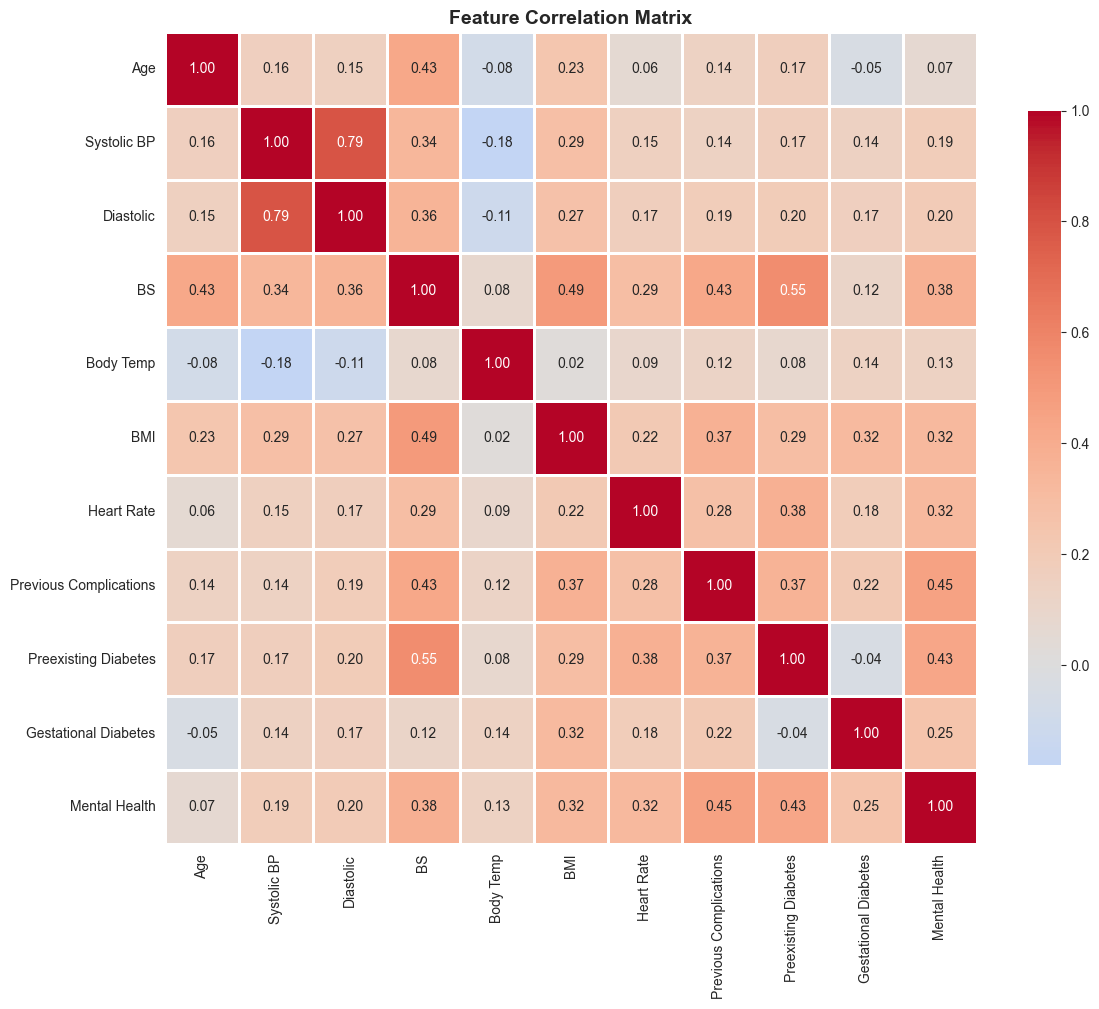

In [18]:
# ============================================================================
# 5. CORRELATION MATRIX
# ============================================================================
print("\n5. FEATURE CORRELATIONS")
print("="*60)

# Calculate correlations (only on complete cases)
df_corr = df[ALL_FEATURES].dropna()
corr_matrix = df_corr.corr()

print(f"\nCorrelation calculated on {len(df_corr)} complete cases")

# PLOT
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig(f'{RESULTS_FIGURES_PATH}correlation_matrix.png', dpi=300, bbox_inches='tight')
print(f"\n✓ Figure saved: {RESULTS_FIGURES_PATH}correlation_matrix.png")
plt.show()


6. FEATURE DISTRIBUTIONS BY RISK LEVEL

✓ Figure saved: ../results/figures/features_by_risk.png


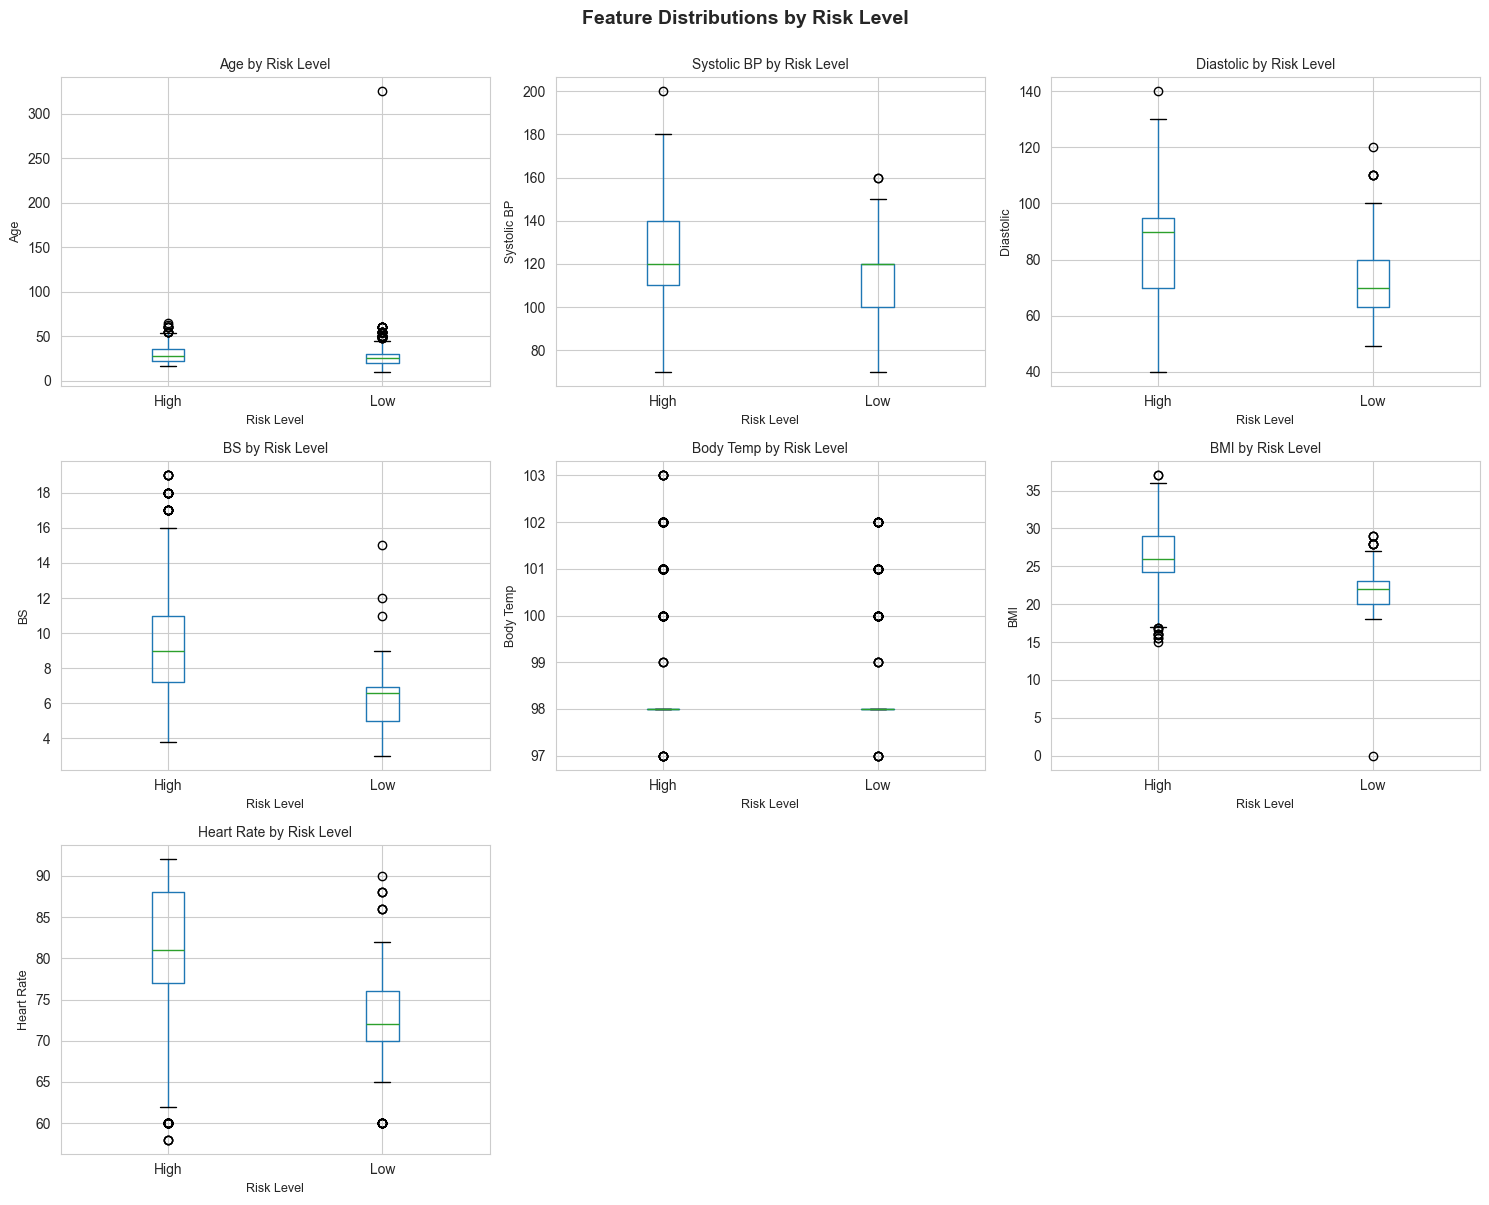

In [19]:
# ============================================================================
# 6. FEATURE DISTRIBUTIONS BY RISK LEVEL
# ============================================================================
print("\n6. FEATURE DISTRIBUTIONS BY RISK LEVEL")
print("="*60)

# Use only complete cases for visualization
df_viz = df[df[TARGET_COLUMN].notna()].copy()

# Box plots for numerical features
n_features = len(NUMERICAL_FEATURES)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
axes = axes.ravel()

for idx, feature in enumerate(NUMERICAL_FEATURES):
    df_viz.boxplot(column=feature, by=TARGET_COLUMN, ax=axes[idx])
    axes[idx].set_title(f'{feature} by Risk Level', fontsize=10)
    axes[idx].set_xlabel('Risk Level', fontsize=9)
    axes[idx].set_ylabel(feature, fontsize=9)

# Remove extra subplots
for idx in range(n_features, len(axes)):
    fig.delaxes(axes[idx])

plt.suptitle('Feature Distributions by Risk Level', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig(f'{RESULTS_FIGURES_PATH}features_by_risk.png', dpi=300, bbox_inches='tight')
print(f"\n✓ Figure saved: {RESULTS_FIGURES_PATH}features_by_risk.png")
plt.show()

In [20]:
# ============================================================================
# 7. EXPLORATION SUMMARY FOR THESIS
# ============================================================================
print("\n" + "="*60)
print("EXPLORATION SUMMARY")
print("="*60)

# Count missing in target
nan_risk = df[TARGET_COLUMN].isna().sum()

# Count missing in features
features_missing = df[ALL_FEATURES].isnull().sum().sum()

print(f"""
Dataset Characteristics:
- Total samples: {df.shape[0]:,}
- Complete cases: {len(df_clean):,}
- Samples with missing Risk Level: {nan_risk}
- Total features: {df.shape[1]}
- Numerical features: {len(NUMERICAL_FEATURES)}
- Boolean features: {len(BOOLEAN_FEATURES)}

Class Distribution (valid cases only):
{class_counts}

Imbalance Ratio: {imbalance_ratio:.2f}:1

Data Quality:
- Missing Risk Level values: {nan_risk} ({nan_risk/len(df)*100:.1f}%)
- Missing feature values: {features_missing}
- Will retain: {len(df_clean):,} samples after removing NaN Risk Level

Key Findings:
1. Class imbalance is {'significant' if imbalance_ratio > 3 else 'moderate'} - will use balanced weights
2. {nan_risk} rows have missing Risk Level - will be dropped in preprocessing
3. All features within expected clinical ranges
4. Ready for preprocessing

Generated Figures:
✓ class_distribution.png
✓ correlation_matrix.png  
✓ features_by_risk.png

Next Step: Data Preprocessing
- Drop rows with missing Risk Level
- Encode target variable (High=1, Low=0)
- Scale numerical features
- Split into train/test sets
""")

print("\n✓ Data exploration complete!")
print(f"✓ After cleaning, we'll have ~{len(df_clean)} samples for training")


EXPLORATION SUMMARY

Dataset Characteristics:
- Total samples: 1,205
- Complete cases: 1,187
- Samples with missing Risk Level: 18
- Total features: 12
- Numerical features: 7
- Boolean features: 4

Class Distribution (valid cases only):
Risk Level
Low     713
High    474
Name: count, dtype: int64

Imbalance Ratio: 1.50:1

Data Quality:
- Missing Risk Level values: 18 (1.5%)
- Missing feature values: 35
- Will retain: 1,187 samples after removing NaN Risk Level

Key Findings:
1. Class imbalance is moderate - will use balanced weights
2. 18 rows have missing Risk Level - will be dropped in preprocessing
3. All features within expected clinical ranges
4. Ready for preprocessing

Generated Figures:
✓ class_distribution.png
✓ correlation_matrix.png  
✓ features_by_risk.png

Next Step: Data Preprocessing
- Drop rows with missing Risk Level
- Encode target variable (High=1, Low=0)
- Scale numerical features
- Split into train/test sets


✓ Data exploration complete!
✓ After cleaning, we'll 